In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [53]:
df = pd.read_csv("../data/extracted_data.csv")
df.head()

,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count
0,Brawadis,22,1514614,156908,5855,35313,1958,1,2,1,34,361,143
1,Apex Legends,20,2381688,146739,2794,16549,566,1,0,1,60,715,448
2,jacksepticeye,24,2038853,353787,2628,40221,4918,3,0,1,53,513,384
3,XXL,10,496771,23251,1856,7647,5088,1,1,1,56,762,250
4,Mr. Kate,26,1123889,45802,964,2196,4004,1,0,1,55,2493,415


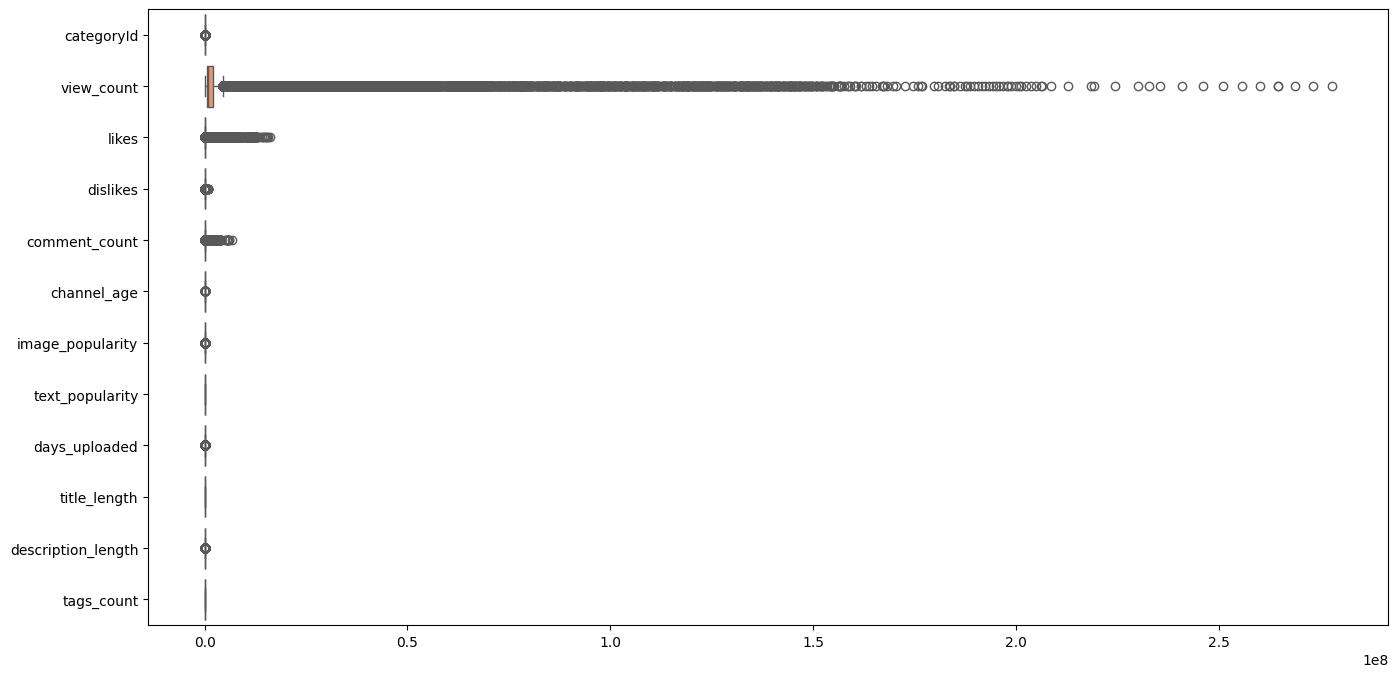

In [38]:
#detekcija autlajera
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df, orient="h", palette="Set2")


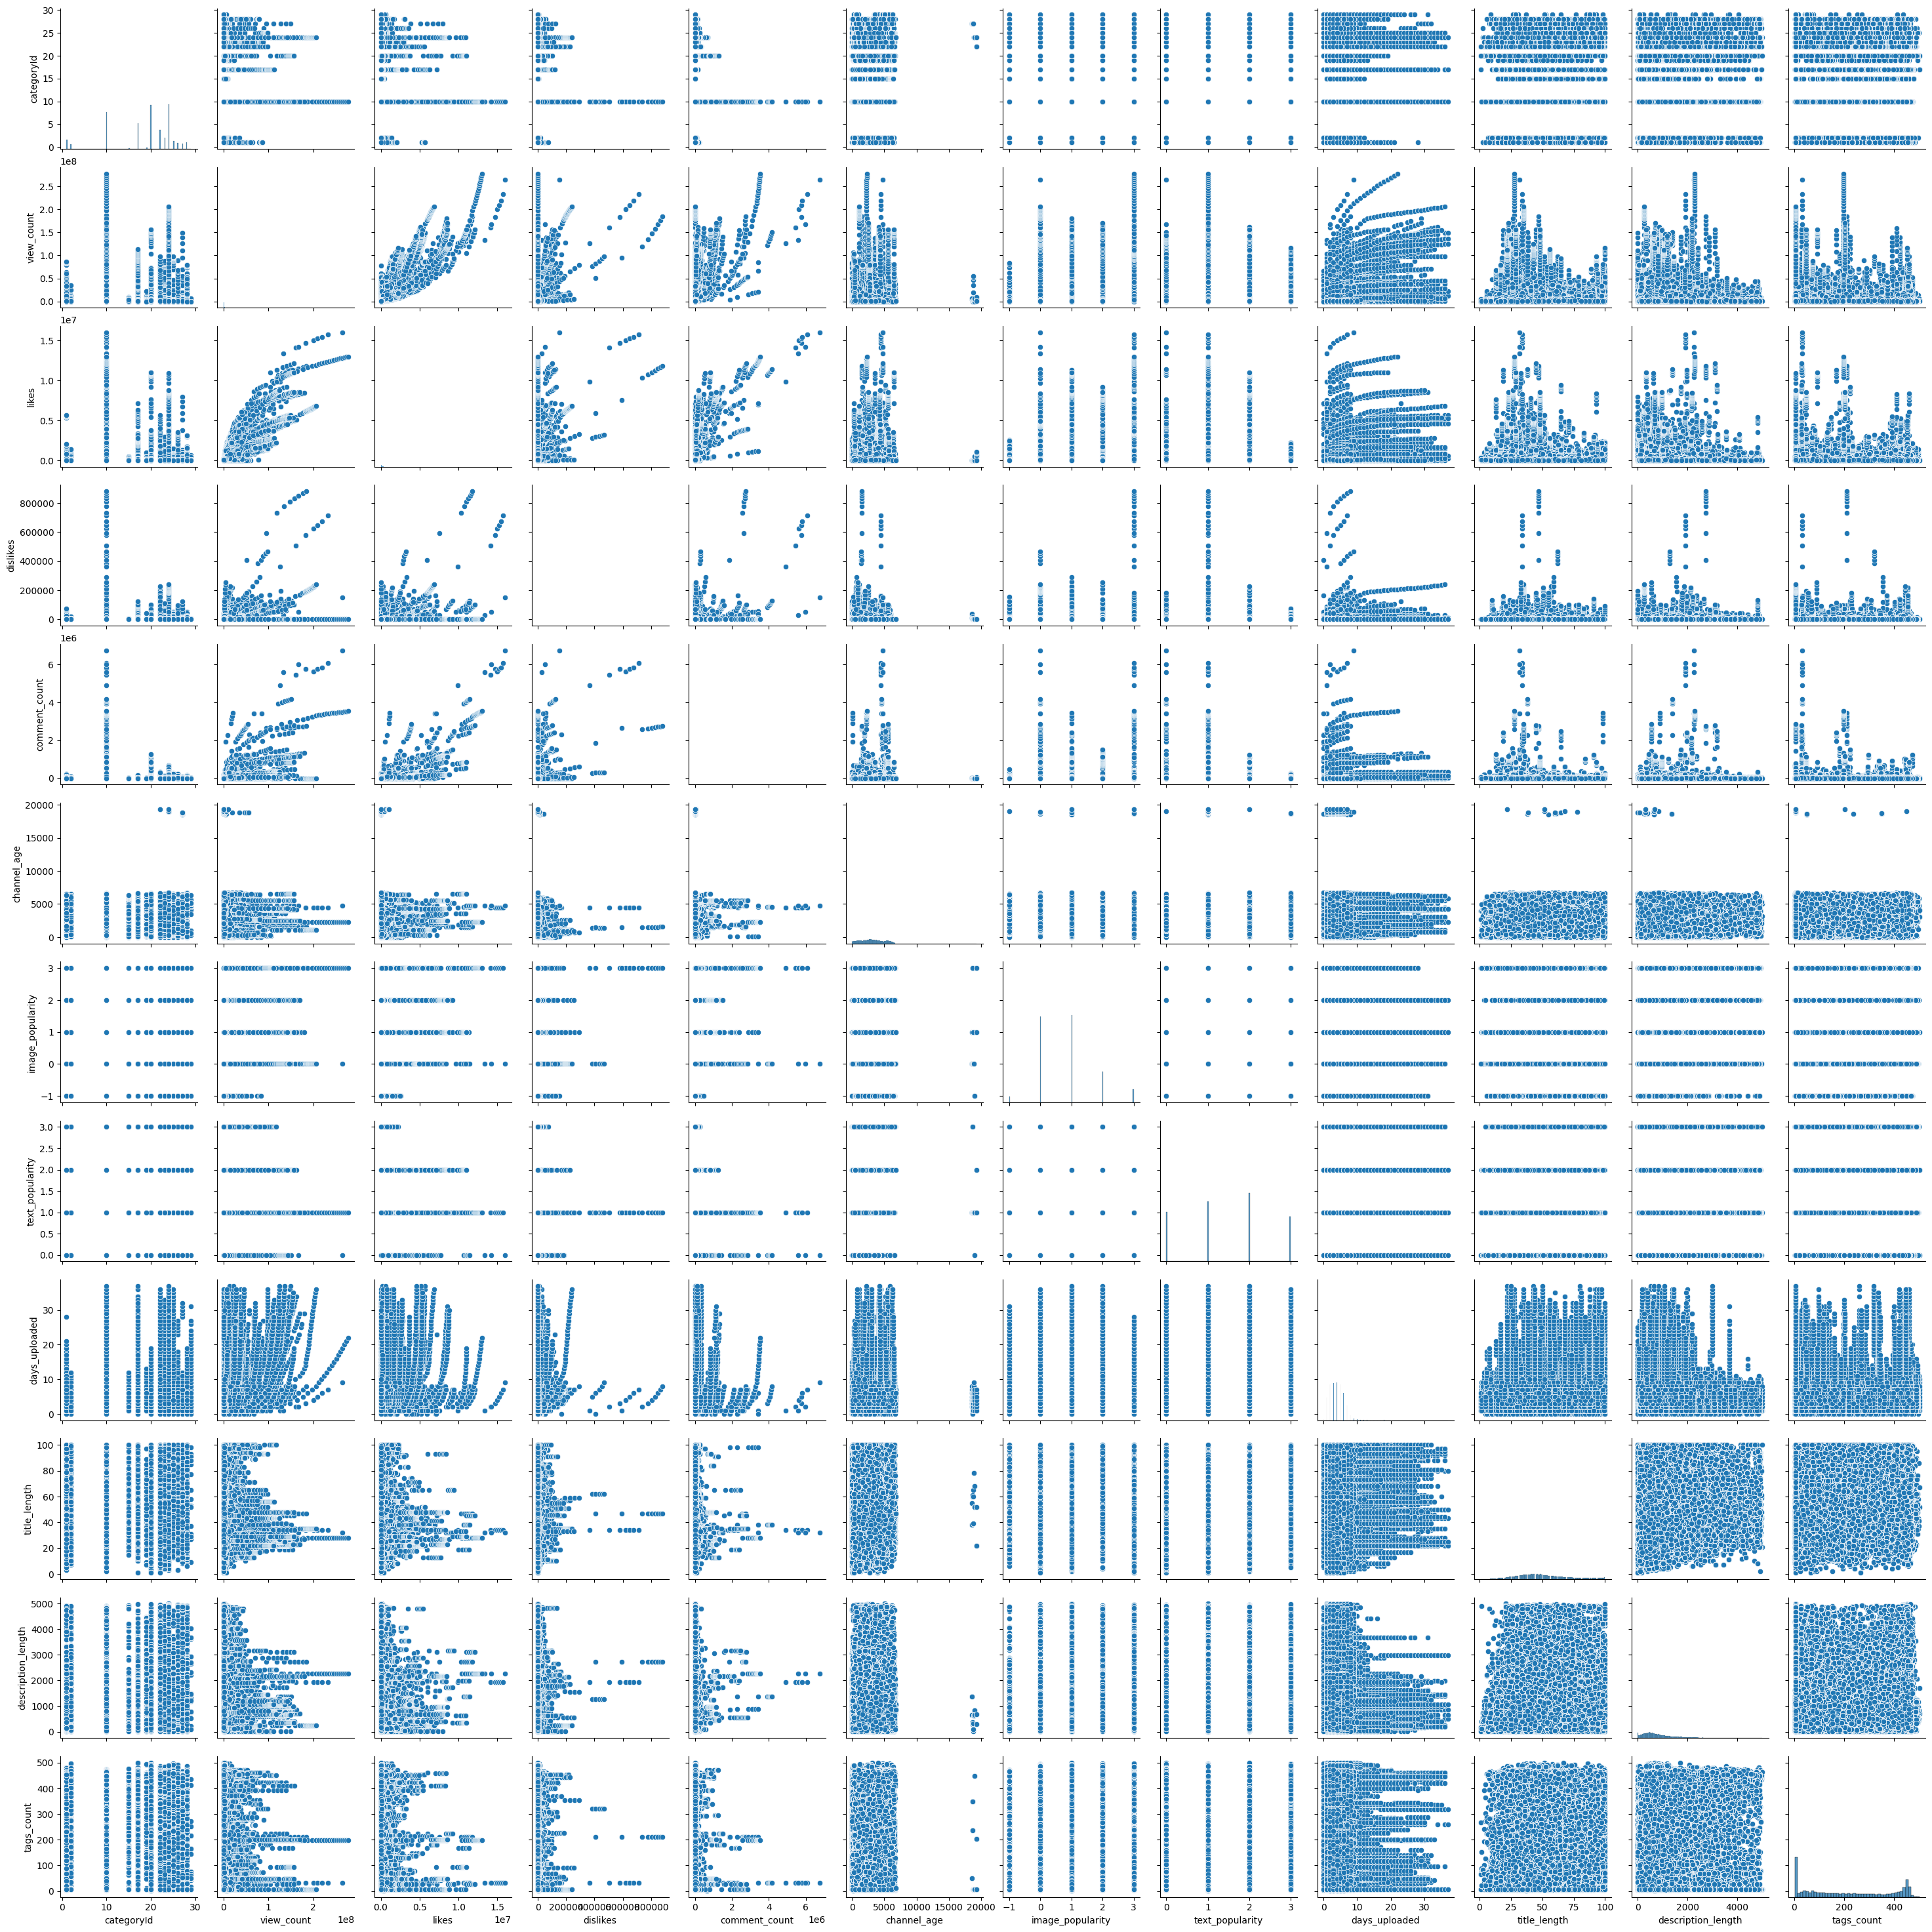

In [39]:
sns.pairplot(df)

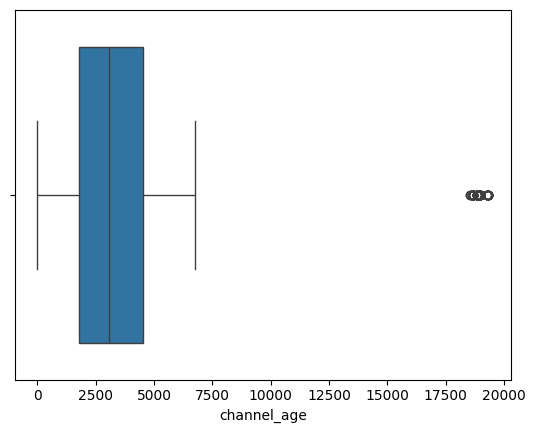

In [40]:
sns.boxplot(x=df['channel_age'])
df = df.sort_values('channel_age',ascending=True)
df = df[df['channel_age']<17500]


In [54]:
#broj nedostajućih vrednosti po kolonama
view_count_mean = df['view_count'].mean()
df["view_count"] = df["view_count"].replace(0,view_count_mean)


In [55]:
likes_mean = df['likes'].mean()
df["likes"] = df["likes"].replace(0,likes_mean)

In [56]:
channel_age_mean = df['channel_age'].mean()
df["channel_age"] = df["channel_age"].replace(-1,channel_age_mean)

In [57]:

percent_of_views = df['dislikes'] / df['view_count'].where(df['dislikes'] > 0, 1)
percent_of_likes = df['dislikes'] / df['likes'].where(df['dislikes'] > 0, 1)
      
mean_value_of_percent_from_views = sum(percent_of_views) / len(percent_of_views)
mean_value_of_percent_from_likes = sum(percent_of_likes) / len(percent_of_likes)

df['dislikes'] = df.apply(lambda row: (row['view_count']*mean_value_of_percent_from_views if row['view_count']*mean_value_of_percent_from_views < row['likes']*mean_value_of_percent_from_likes else row['likes']*mean_value_of_percent_from_likes if row['dislikes'] == 0 else row['dislikes']), axis=1)


In [58]:
def categorize_image(row):
    likes_to_view_percent = row['likes'] * 100 / row['view_count']
    if likes_to_view_percent < 2:
        return int(2)
    
    if likes_to_view_percent >= 2 and likes_to_view_percent < 5:
        return int(1)
    
    if likes_to_view_percent >= 5 and likes_to_view_percent < 10:
        return int(0)
    
    if likes_to_view_percent >= 10:
        return int(3)

In [59]:
df['image_popularity'] = df.apply(lambda row: categorize_image(row) if row['image_popularity'] == -1 else int(row['image_popularity']), axis=1)
df.head()

,channelTitle,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count
0,Brawadis,22,1514614.0,156908.0,696.438236,35313,1958.0,1,2,1,34,361,143
1,Apex Legends,20,2381688.0,146739.0,1095.129578,16549,566.0,1,0,1,60,715,448
2,jacksepticeye,24,2038853.0,353787.0,937.489807,40221,4918.0,3,0,1,53,513,384
3,XXL,10,496771.0,23251.0,228.421445,7647,5088.0,1,1,1,56,762,250
4,Mr. Kate,26,1123889.0,45802.0,516.778052,2196,4004.0,1,0,1,55,2493,415


In [60]:
df['channel_title_mean_views'] = df.groupby('channelTitle')['view_count'].transform('mean')
df['channel_title_max_views'] = df.groupby('channelTitle')['view_count'].transform('max')
df['channel_title_min_views'] = df.groupby('channelTitle')['view_count'].transform('min')
df['channel_title_mean_comments'] = df.groupby('channelTitle')['comment_count'].transform('mean')
df['channel_title_max_comments'] = df.groupby('channelTitle')['comment_count'].transform('max')
df['channel_title_min_comments'] = df.groupby('channelTitle')['comment_count'].transform('min')

df.drop('channelTitle', axis='columns', inplace=True)
df.head()

,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,22,1514614.0,156908.0,696.438236,35313,1958.0,1,2,1,34,361,143,1.713608e+06,3958226.0,480970.0,18033.333333,45574,1471
1,20,2381688.0,146739.0,1095.129578,16549,566.0,1,0,1,60,715,448,2.419552e+06,7003748.0,402885.0,8378.864811,27451,1324
2,24,2038853.0,353787.0,937.489807,40221,4918.0,3,0,1,53,513,384,2.159255e+06,6582365.0,344173.0,18964.178862,207849,1764
3,10,496771.0,23251.0,228.421445,7647,5088.0,1,1,1,56,762,250,1.111062e+06,4274628.0,124775.0,9658.552326,41789,687
4,26,1123889.0,45802.0,516.778052,2196,4004.0,1,0,1,55,2493,415,5.394150e+05,2400821.0,182202.0,1524.144578,4867,384


In [61]:
#duplikati
df.nunique()


categoryId                         15
view_count                     234651
likes                          130808
dislikes                       207176
comment_count                   34423
channel_age                      6754
image_popularity                    4
text_popularity                     4
days_uploaded                      38
title_length                      100
description_length               4221
tags_count                        496
channel_title_mean_views         8221
channel_title_max_views          8207
channel_title_min_views          8169
channel_title_mean_comments      7858
channel_title_max_comments       5826
channel_title_min_comments       3427
dtype: int64

In [62]:
duplicate_all = df.loc[df.duplicated(keep=False).values]

duplicate_all


,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
3499,22,162958.0,16013.00000,74.930102,1098,61.0,0,2,3,35,270,6,2.227372e+05,296044.0,162958.0,899.777778,1128,629
3500,22,162958.0,16013.00000,74.930102,1098,61.0,0,2,3,35,270,6,2.227372e+05,296044.0,162958.0,899.777778,1128,629
38214,20,116363.0,131122.74208,53.505146,0,4980.0,0,0,1,39,340,177,1.800504e+05,279109.0,116363.0,0.000000,0,0
38227,17,609686.0,8446.00000,225.000000,1347,566.0,2,1,3,94,1014,462,1.111318e+06,4214388.0,115849.0,2597.421053,8095,406
38233,17,1310805.0,6243.00000,998.000000,1985,2238.0,2,1,3,66,449,467,1.747839e+06,5473530.0,218837.0,3804.486911,10435,552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38845,27,448881.0,18965.00000,206.401032,1386,4033.0,1,1,2,23,2064,6,9.009647e+05,3318386.0,239729.0,2967.609694,11161,473
38846,24,463373.0,27957.00000,213.064632,2072,2577.0,1,2,3,34,926,6,5.372690e+05,1470487.0,188227.0,3224.027397,11585,1093
38848,23,3361953.0,296359.00000,1545.867540,28468,2409.0,0,0,4,26,1668,450,1.100403e+06,4882602.0,148714.0,14080.377193,51966,1930
38849,22,1688785.0,55264.00000,776.524215,2075,186.0,1,0,4,48,1769,295,1.221459e+06,4670372.0,176862.0,1412.298701,5047,231


In [63]:
df = df.drop_duplicates()
df


,categoryId,view_count,likes,dislikes,comment_count,channel_age,image_popularity,text_popularity,days_uploaded,title_length,description_length,tags_count,channel_title_mean_views,channel_title_max_views,channel_title_min_views,channel_title_mean_comments,channel_title_max_comments,channel_title_min_comments
0,22,1514614.0,156908.0,696.438236,35313,1958.0,1,2,1,34,361,143,1.713608e+06,3958226.0,480970.0,18033.333333,45574,1471
1,20,2381688.0,146739.0,1095.129578,16549,566.0,1,0,1,60,715,448,2.419552e+06,7003748.0,402885.0,8378.864811,27451,1324
2,24,2038853.0,353787.0,937.489807,40221,4918.0,3,0,1,53,513,384,2.159255e+06,6582365.0,344173.0,18964.178862,207849,1764
3,10,496771.0,23251.0,228.421445,7647,5088.0,1,1,1,56,762,250,1.111062e+06,4274628.0,124775.0,9658.552326,41789,687
4,26,1123889.0,45802.0,516.778052,2196,4004.0,1,0,1,55,2493,415,5.394150e+05,2400821.0,182202.0,1524.144578,4867,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245982,23,563422.0,68917.0,259.068399,1822,3634.0,1,1,7,34,410,257,6.192998e+05,1215682.0,193491.0,5528.275362,14815,1290
245983,20,2440589.0,114121.0,1122.212985,5828,2833.0,1,2,7,40,1096,26,3.769471e+06,14325792.0,344733.0,28045.474138,79116,1706
245984,17,474333.0,5730.0,91.672717,343,2027.0,2,3,6,81,156,454,8.299174e+05,5190725.0,127912.0,1420.061966,9074,103
245985,24,804338.0,29540.0,369.844553,1972,6764.0,1,2,6,47,851,13,1.119507e+07,44466586.0,273277.0,22689.891304,81811,1251


In [64]:
df.to_csv('../data/preprocessed_data.csv', index=False)